In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("./Classified Data.csv",index_col=0)

In [6]:
df.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,
0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [19]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
df_feat.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Pair Plot

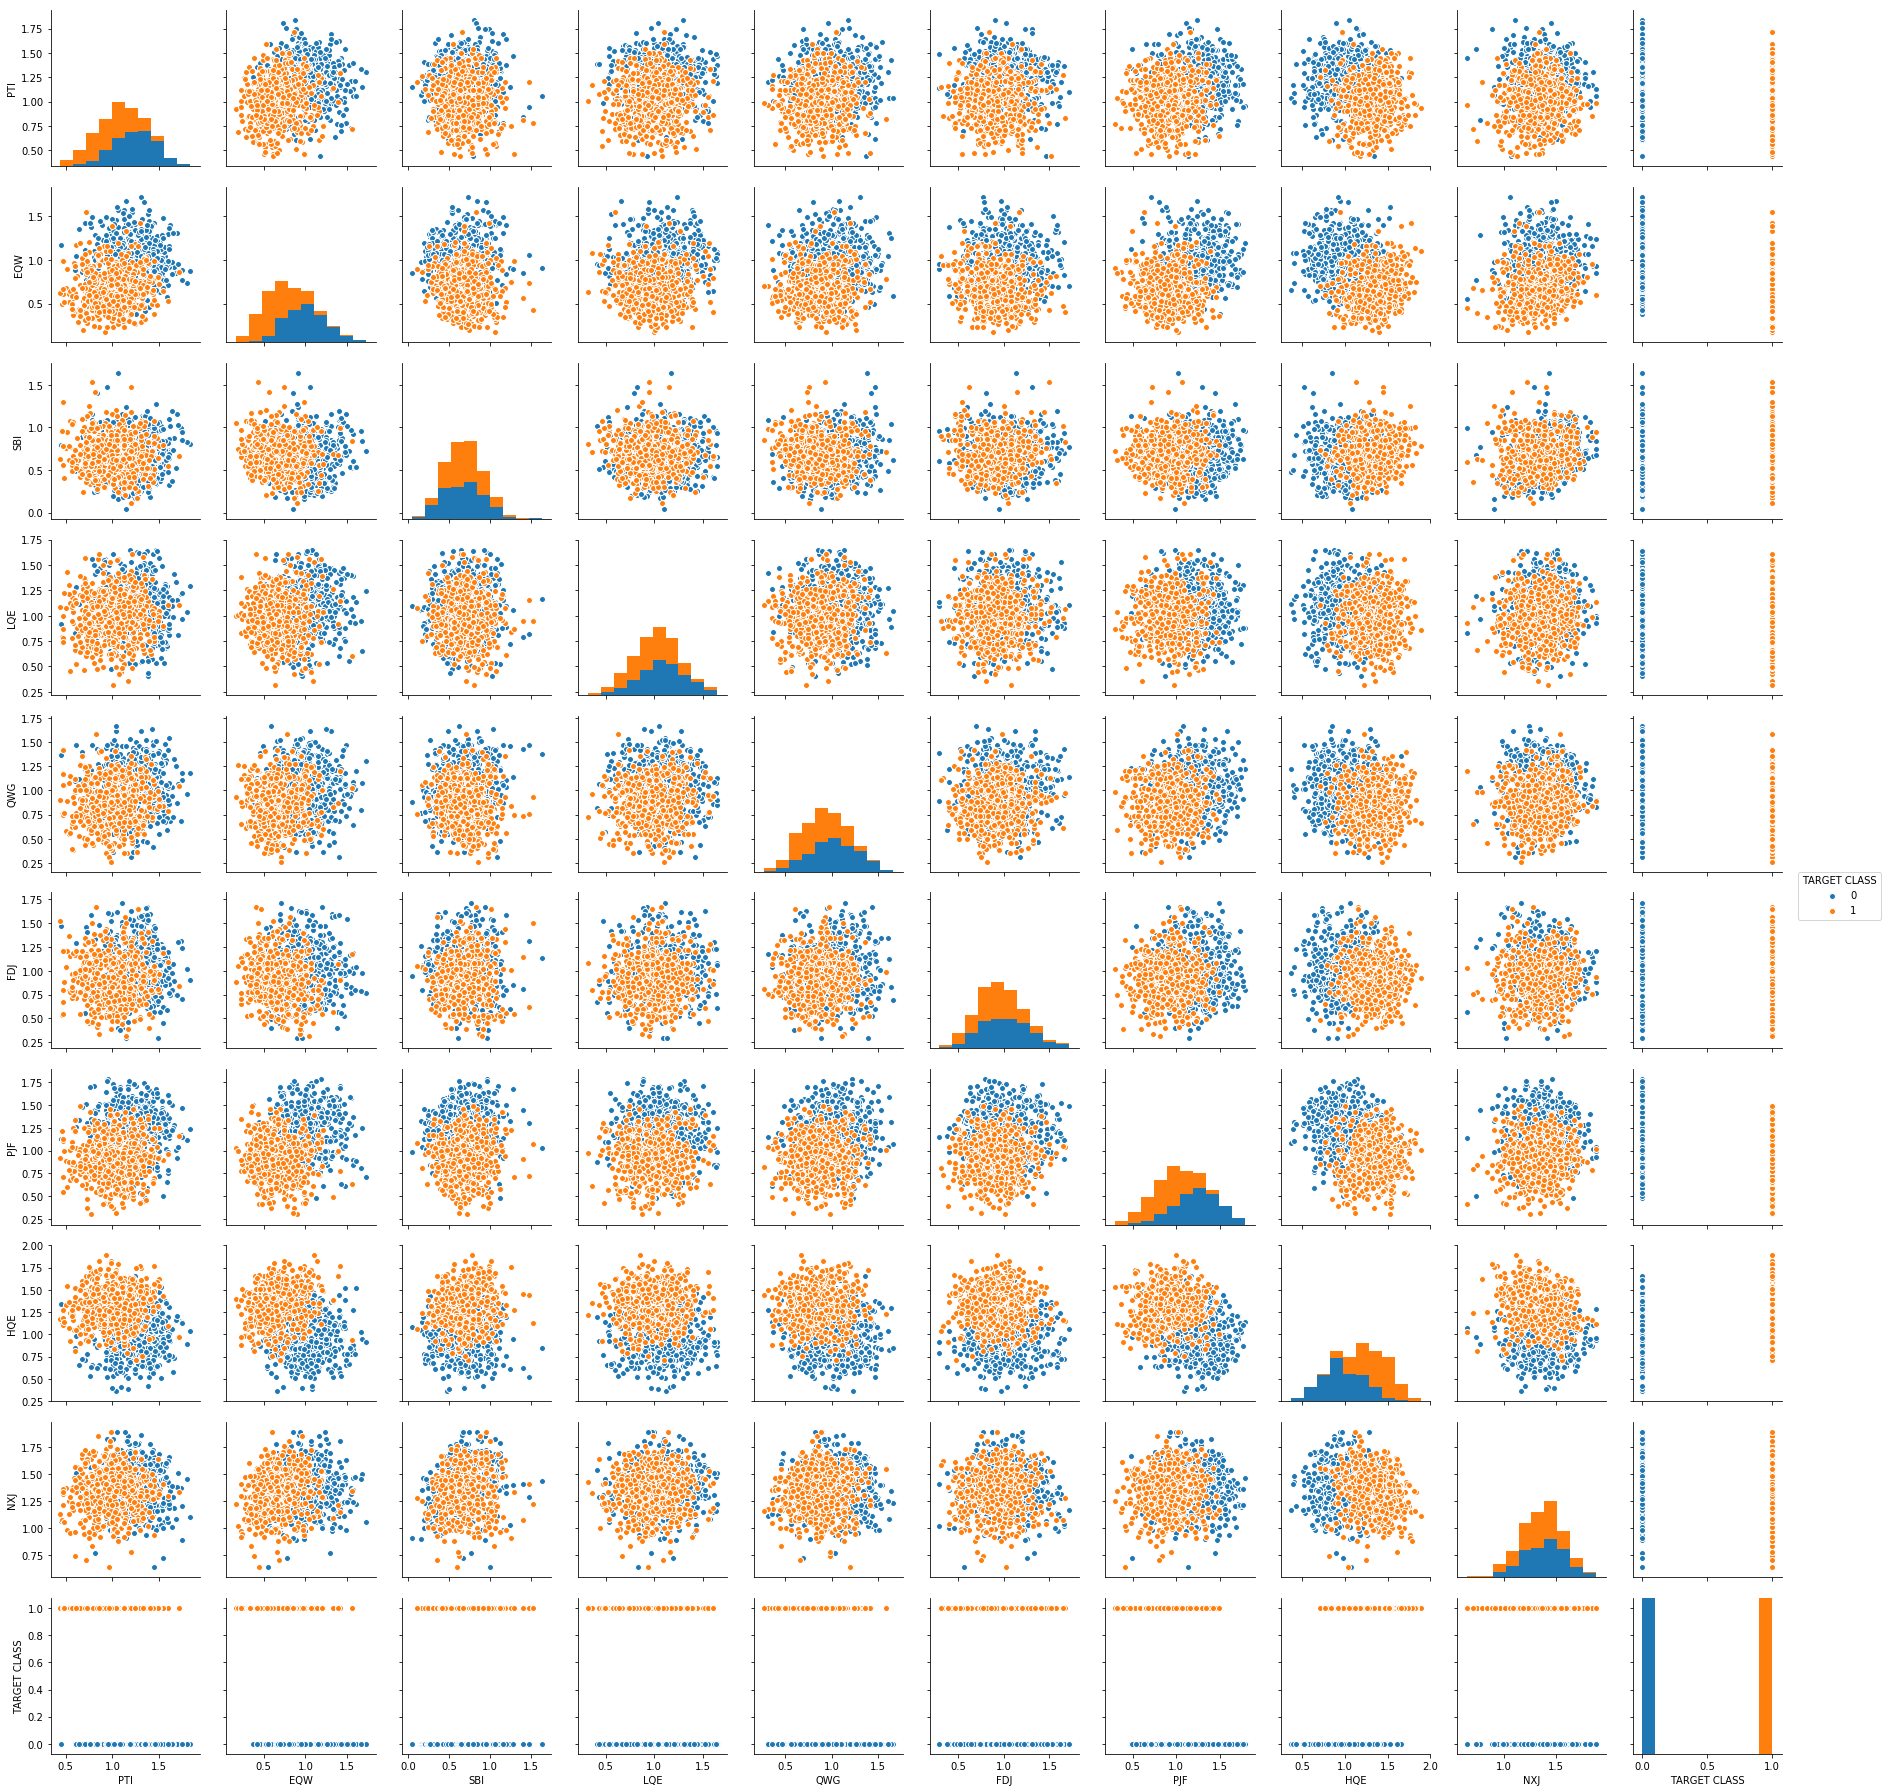

In [22]:
import seaborn as sns
sns.pairplot(df,hue='TARGET CLASS')

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fitc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
pred = knn.predict(X_test)

# Predictions and Evaluations¶

Let's evaluate our KNN model!

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 

In [35]:
print(confusion_matrix(y_test,pred))

[[138  14]
 [ 18 130]]


In [36]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90       152
          1       0.90      0.88      0.89       148

avg / total       0.89      0.89      0.89       300



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [37]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df['TARGET CLASS'], cv=10)
    accuracy_rate.append(score.mean())
    

In [38]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

Text(0,0.5,'Error Rate')

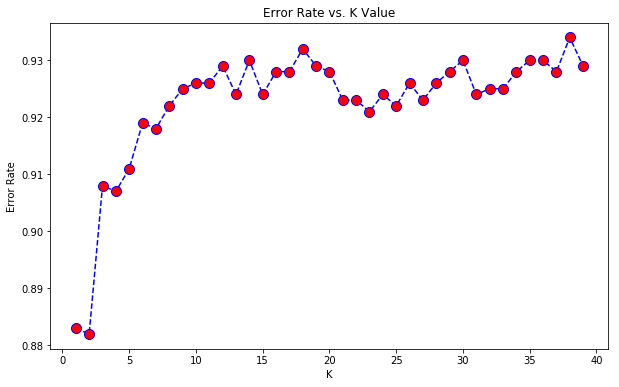

In [39]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [43]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("with k = 1")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

with k = 1


[[138  14]
 [ 18 130]]


             precision    recall  f1-score   support

          0       0.88      0.91      0.90       152
          1       0.90      0.88      0.89       148

avg / total       0.89      0.89      0.89       300



In [44]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[138  14]
 [  9 139]]


             precision    recall  f1-score   support

          0       0.94      0.91      0.92       152
          1       0.91      0.94      0.92       148

avg / total       0.92      0.92      0.92       300

